In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load the dataset
titanic = pd.read_csv("train.csv")

In [3]:
# view the first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# PassengerId column no need because ilready we have index so lets remove that
titanic.drop("PassengerId", axis=1, inplace=True)

In [5]:
# just confirm wheather PassengerId removed or not
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Lets see the total rows and columns in the dataset
print("Total Rows : ", titanic.shape[0])
print("Total Columns : ", titanic.shape[1])

Total Rows :  891
Total Columns :  11


In [7]:
# Lets check the data-types of each column
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


👀```here we can see some columns having object type so need to handle them```

In [8]:
# Lets check any null values in the dataset
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

👀```Here i can see Age Column have 177 Null-Values and Cabin Column 688 and Embarked 2```

<Axes: xlabel='Age'>

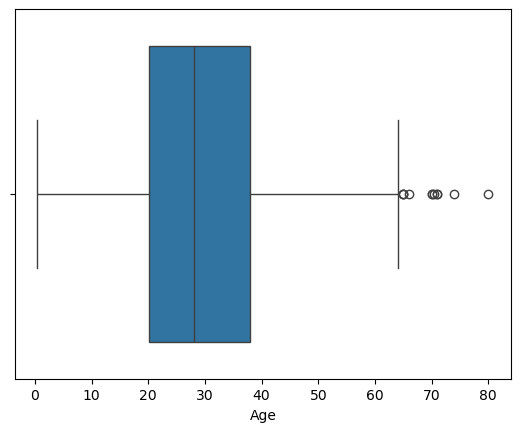

In [9]:
# Lets Handle Age column for that lets do plot
sns.boxplot(data=titanic, x="Age")

👀```Age Column having some outliers need to handle them also```

In [10]:
# Lets deside about Cabin colum to remove or what to do
print(f"Cabin Column have {titanic["Cabin"].isnull().sum()/titanic.shape[0] * 100:0.2f} % Null Values")

Cabin Column have 77.10 % Null Values


In [11]:
# Cabin Column have 77.10 % Null Values so lets remove that
titanic.drop("Cabin", axis=1, inplace=True)

In [12]:
# just confirm wheather Cabin removed or not
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Lets do EDA and FE to Numerical Features

In [13]:
# Lets find all numerical features
numerical_features = [feature for feature in titanic.columns if titanic[feature].dtype != "object"]
numerical_features

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
# lets see all numerical_features in dataset
titanic[numerical_features]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [15]:
# Lets impute all the null values with mode to the Age Column
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_52244\3122458595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)


In [16]:
# lets check 
titanic["Age"].isnull().sum()

0

### Lets do EDA and FE to Categorical Features

In [17]:
# Lets find all categorical features
categorical_features = [feature for feature in titanic.columns if titanic[feature].dtype == "object"]
categorical_features

['Name', 'Sex', 'Ticket', 'Embarked']

In [18]:
# lets remove Name feature i do not think it will help to the prediction
titanic.drop("Name", axis=1, inplace=True)

In [19]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [20]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [21]:
# let me remove that Embarked 2 Null values row
titanic.dropna(inplace=True)

In [22]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [23]:
titanic.shape

(889, 9)

In [24]:
# Lets remove Ticket feature
titanic.drop("Ticket", axis=1, inplace=True)

In [25]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
# Lets do label encoding to Sex
titanic["Sex"] = titanic["Sex"].replace({"male": 1, "female": 2})

C:\Users\Admin\AppData\Local\Temp\ipykernel_52244\575474780.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["Sex"] = titanic["Sex"].replace({"male": 1, "female": 2})


In [27]:
titanic["Sex"]

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [28]:
# Lets perform one-hot encoding to Embarked feature
titanic = pd.get_dummies(titanic, columns=["Embarked"], drop_first=True, dtype=int)

In [29]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,2,38.0,1,0,71.2833,0,0
2,1,3,2,26.0,0,0,7.9250,0,1
3,1,1,2,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked_Q  889 non-null    int32  
 8   Embarked_S  889 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 62.5 KB


In [43]:
X = titanic.drop(["Survived"], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,2,38.0,1,0,71.2833,0,0
2,3,2,26.0,0,0,7.9250,0,1
3,1,2,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,1
887,1,2,19.0,0,0,30.0000,0,1
888,3,2,28.0,1,2,23.4500,0,1
889,1,1,26.0,0,0,30.0000,0,0


In [45]:
y = titanic["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

I:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [65]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7809


In [66]:
# 2. Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.6923


In [67]:
# 3. Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.7826


In [68]:
# 4. F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.7347


In [69]:
# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[85 24]
 [15 54]]


In [70]:
from sklearn.metrics import confusion_matrix, roc_auc_score, log_loss, roc_curve, matthews_corrcoef

In [72]:
y_pred_prob = model.predict_proba(X_test)[:, 1] 

In [73]:
# 6. AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.4f}")

AUC-ROC: 0.8517


In [74]:
# 7. Log-Loss
logloss = log_loss(y_test, y_pred_prob)
print(f"Log-Loss: {logloss:.4f}")

Log-Loss: 0.4580


In [75]:
# 8. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")

False Positive Rate: [0.         0.00917431 0.00917431 0.01834862 0.01834862 0.02752294
 0.02752294 0.04587156 0.04587156 0.05504587 0.05504587 0.06422018
 0.06422018 0.0733945  0.0733945  0.08256881 0.08256881 0.09174312
 0.09174312 0.10091743 0.11926606 0.11926606 0.12844037 0.12844037
 0.18348624 0.18348624 0.19266055 0.19266055 0.22018349 0.22018349
 0.2293578  0.2293578  0.23853211 0.23853211 0.25688073 0.25688073
 0.28440367 0.28440367 0.29357798 0.29357798 0.31192661 0.31192661
 0.43119266 0.43119266 0.51376147 0.53211009 0.60550459 0.62385321
 0.67889908 0.69724771 0.71559633 0.71559633 0.75229358 0.78899083
 0.81651376 0.85321101 0.85321101 0.87155963 0.87155963 0.88990826
 0.88990826 0.90825688 0.90825688 1.        ]
True Positive Rate: [0.         0.         0.23188406 0.23188406 0.4057971  0.42028986
 0.47826087 0.47826087 0.50724638 0.50724638 0.53623188 0.53623188
 0.56521739 0.56521739 0.62318841 0.62318841 0.65217391 0.65217391
 0.68115942 0.68115942 0.68115942 0.695652

In [76]:
# 9. Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.5523
